In [30]:
from pylattica.visualization import SquareGridArtist2D
from pylattica.visualization import CellArtist
from pylattica.core import PeriodicStructure, SimulationState, SynchronousRunner
from pylattica.visualization import CellArtist
from pylattica.core.neighborhood_builders import DistanceNeighborhoodBuilder
from pylattica.core import BasicController, SimulationState
from pylattica.discrete.state_constants import DISCRETE_OCCUPANCY
from pylattica.core.simulation_state import SITES
from pylattica.visualization import ResultArtist
import random
import json

In [15]:
file_path = "/Users/xavi/Documents/grad_school/CS267/final_project/cpplattica/build/output.json"
json_file = open(file_path, 'r')
periodic_structure_dict = json.load(json_file)

{'lattice': {'vectors': [[0, 32], [32, 0]], 'periodic': [1, 1]},
 '_sites': {'0': {'_location': [0, 0], '_site_class': '_A', '_site_id': 0},
  '1': {'_location': [1, 0], '_site_class': '_A', '_site_id': 1},
  '2': {'_location': [2, 0], '_site_class': '_A', '_site_id': 2},
  '3': {'_location': [3, 0], '_site_class': '_A', '_site_id': 3},
  '4': {'_location': [4, 0], '_site_class': '_A', '_site_id': 4},
  '5': {'_location': [5, 0], '_site_class': '_A', '_site_id': 5},
  '6': {'_location': [6, 0], '_site_class': '_A', '_site_id': 6},
  '7': {'_location': [7, 0], '_site_class': '_A', '_site_id': 7},
  '8': {'_location': [8, 0], '_site_class': '_A', '_site_id': 8},
  '9': {'_location': [9, 0], '_site_class': '_A', '_site_id': 9},
  '10': {'_location': [10, 0], '_site_class': '_A', '_site_id': 10},
  '11': {'_location': [11, 0], '_site_class': '_A', '_site_id': 11},
  '12': {'_location': [12, 0], '_site_class': '_A', '_site_id': 12},
  '13': {'_location': [13, 0], '_site_class': '_A', '_site

In [16]:
structure = PeriodicStructure.from_dict(periodic_structure_dict)

In [17]:
initial_state = SimulationState.from_struct(structure)

{'state': {'SITES': {0: {'_site_id': 0},
   1: {'_site_id': 1},
   2: {'_site_id': 2},
   3: {'_site_id': 3},
   4: {'_site_id': 4},
   5: {'_site_id': 5},
   6: {'_site_id': 6},
   7: {'_site_id': 7},
   8: {'_site_id': 8},
   9: {'_site_id': 9},
   10: {'_site_id': 10},
   11: {'_site_id': 11},
   12: {'_site_id': 12},
   13: {'_site_id': 13},
   14: {'_site_id': 14},
   15: {'_site_id': 15},
   16: {'_site_id': 16},
   17: {'_site_id': 17},
   18: {'_site_id': 18},
   19: {'_site_id': 19},
   20: {'_site_id': 20},
   21: {'_site_id': 21},
   22: {'_site_id': 22},
   23: {'_site_id': 23},
   24: {'_site_id': 24},
   25: {'_site_id': 25},
   26: {'_site_id': 26},
   27: {'_site_id': 27},
   28: {'_site_id': 28},
   29: {'_site_id': 29},
   30: {'_site_id': 30},
   31: {'_site_id': 31},
   32: {'_site_id': 32},
   33: {'_site_id': 33},
   34: {'_site_id': 34},
   35: {'_site_id': 35},
   36: {'_site_id': 36},
   37: {'_site_id': 37},
   38: {'_site_id': 38},
   39: {'_site_id': 39},
  

In [18]:
dead = "DEAD"
alive = "ALIVE"
state = "STATE"

state_choices = [dead, alive]

for site_id in structure.site_ids:
    initial_state.set_site_state(site_id, {
        state: random.choice(state_choices)
    })

{'state': {'SITES': {0: {'_site_id': 0, 'STATE': 'ALIVE'},
   1: {'_site_id': 1, 'STATE': 'ALIVE'},
   2: {'_site_id': 2, 'STATE': 'DEAD'},
   3: {'_site_id': 3, 'STATE': 'ALIVE'},
   4: {'_site_id': 4, 'STATE': 'DEAD'},
   5: {'_site_id': 5, 'STATE': 'DEAD'},
   6: {'_site_id': 6, 'STATE': 'ALIVE'},
   7: {'_site_id': 7, 'STATE': 'ALIVE'},
   8: {'_site_id': 8, 'STATE': 'ALIVE'},
   9: {'_site_id': 9, 'STATE': 'ALIVE'},
   10: {'_site_id': 10, 'STATE': 'DEAD'},
   11: {'_site_id': 11, 'STATE': 'ALIVE'},
   12: {'_site_id': 12, 'STATE': 'DEAD'},
   13: {'_site_id': 13, 'STATE': 'DEAD'},
   14: {'_site_id': 14, 'STATE': 'ALIVE'},
   15: {'_site_id': 15, 'STATE': 'ALIVE'},
   16: {'_site_id': 16, 'STATE': 'ALIVE'},
   17: {'_site_id': 17, 'STATE': 'DEAD'},
   18: {'_site_id': 18, 'STATE': 'DEAD'},
   19: {'_site_id': 19, 'STATE': 'ALIVE'},
   20: {'_site_id': 20, 'STATE': 'DEAD'},
   21: {'_site_id': 21, 'STATE': 'DEAD'},
   22: {'_site_id': 22, 'STATE': 'DEAD'},
   23: {'_site_id': 23, 

In [19]:
class GoLCellArtist(CellArtist):
    
    def get_color_from_cell_state(self, cell_state):
        if cell_state[state] == dead:
            return (0,100,150)
        else:
            return (255, 255, 150)
    
    def get_cell_legend_label(self, cell_state):
        if cell_state[state] == dead:
            return "Dead"
        else:
            return "Alive"

In [20]:
grid_artist = SquareGridArtist2D(structure, cell_artist=GoLCellArtist())

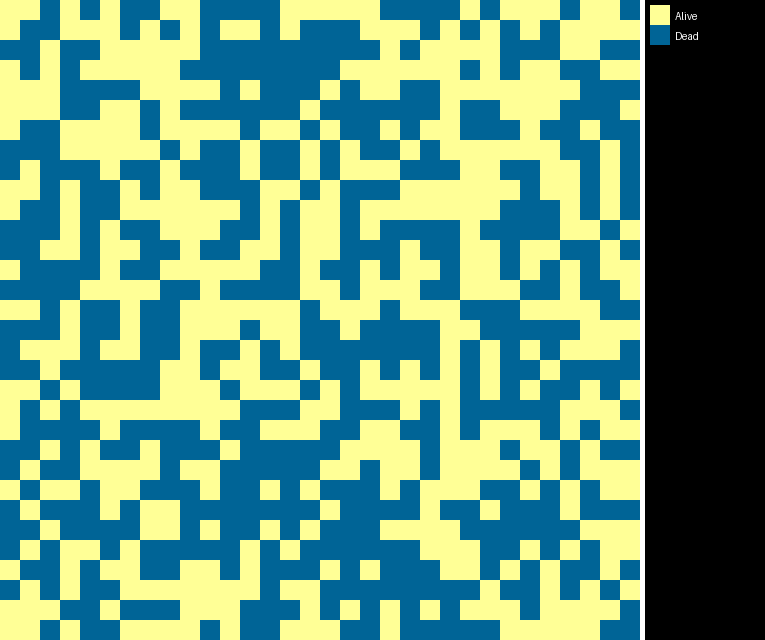

In [21]:
grid_artist.jupyter_show(initial_state, cell_size=20)

In [22]:
builder = DistanceNeighborhoodBuilder(cutoff=1.5)  
nb_hood = builder.get(structure)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:08<00:00, 125.61it/s]


In [23]:
site = structure.site_at((5,5))
nbs = nb_hood.neighbors_of(site['_site_id'])

In [24]:
for nb_id in nbs:
    site = structure.get_site(nb_id)
    print(f'Neighbor with ID {nb_id} is at {site["_location"]}')

Neighbor with ID 133 is at [5. 4.]
Neighbor with ID 196 is at [4. 6.]
Neighbor with ID 134 is at [6. 4.]
Neighbor with ID 166 is at [6. 5.]
Neighbor with ID 132 is at [4. 4.]
Neighbor with ID 164 is at [4. 5.]
Neighbor with ID 197 is at [5. 6.]
Neighbor with ID 198 is at [6. 6.]


In [25]:
def update_state(old_state, neighboring_states):
    alive_neighbor_count = 0
    dead_neighbor_count = 0
    
    for state in neighboring_states:
        if state == alive:
            alive_neighbor_count += 1
        else:
            # since all cells are either alive or dead, nothing else
            dead_neighbor_count += 1
    
    # Now, we can implement the rules in python logic:
    if old_state == alive:
        if alive_neighbor_count < 2:
            return dead
        elif alive_neighbor_count == 2 or alive_neighbor_count == 3:
            return alive
        elif alive_neighbor_count > 3:
            return dead
    elif old_state == dead:
        if alive_neighbor_count == 3:
            return alive
        else:
            return dead
    
    return old_state

class GameOfLifeController(BasicController):
    
    def __init__(self, structure):
        self.structure = structure
    
    def pre_run(self, initial_state):
        # Before the simulation runs, we build a neighborhood based on the 
        # structure of the current simulation.
        self.neighborhood = DistanceNeighborhoodBuilder(1.5).get(self.structure)
    
    def get_state_update(self, site_id, curr_state: SimulationState):
        neighbor_site_ids = self.neighborhood.neighbors_of(site_id)
        
        neighbor_states = []
        for nb_site_id in neighbor_site_ids:
            neighbor_state = curr_state.get_site_state(nb_site_id)
            neighbor_states.append(neighbor_state[state])

        current_state = curr_state.get_site_state(site_id)[state]
        
        new_state = update_state(current_state, neighbor_states)
        # print(site_id, current_state, neighbor_states, new_state)
        updates = {
            state: new_state
        }
        return updates

In [26]:
controller = GameOfLifeController(structure)
runner = SynchronousRunner(parallel = True)
result = runner.run(initial_state, controller, 100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 487.67it/s]


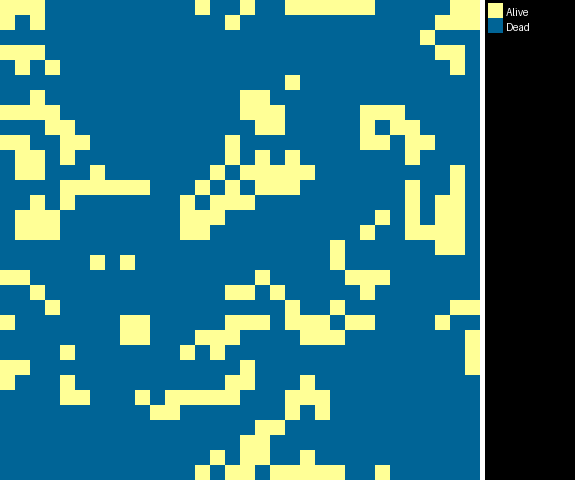

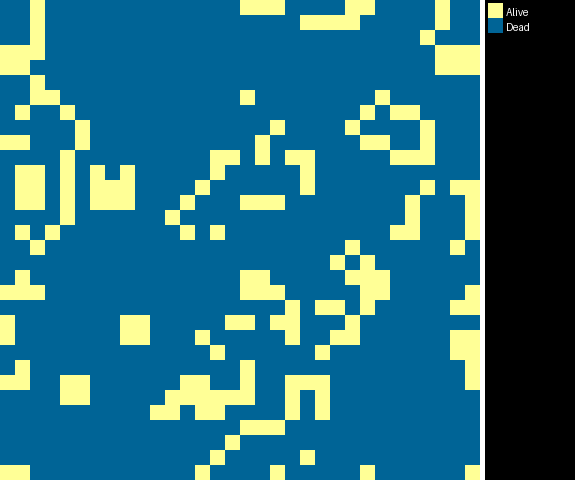

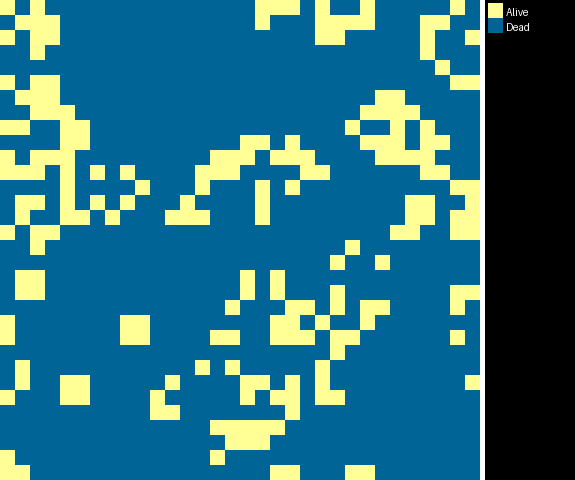

In [28]:
grid_artist.jupyter_show(result.get_step(10), cell_size=15)
grid_artist.jupyter_show(result.get_step(11), cell_size=15)
grid_artist.jupyter_show(result.get_step(12), cell_size=15)

In [32]:
res_artist = ResultArtist(grid_artist, result)
res_artist.to_gif("out.gif", wait=0.1)